<a href="https://colab.research.google.com/github/pavi-1994/Coronaviruse_tweet_analysis/blob/main/CoronaViruse_Tweet_Aanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CoronaViruse Tweet Aanlysis**

##Problem Description

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.


The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing regular expression
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#Applying CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB 

#Logistic regression
from sklearn.linear_model import LogisticRegression

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#XGBoost 
from xgboost import XGBClassifier

#SVM Model
from sklearn.svm import SVC

#lightgbm
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#evaluation Metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing data

In [3]:
#importing dataset
path="/content/drive/MyDrive/almabetter/module 4/corornaviruse_tweet analysis/Coronavirus Tweets.csv"
corona_df=pd.read_csv(path, encoding='latin-1')

### First View Of Data

In [4]:
#last 5 rows of the dataset
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
#last 5 rows of the dataset
corona_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Creating the copy of dataset


In [6]:
#create a copy
crn_df=corona_df.copy()

Lets see shape and size of the data

In [7]:
#no. of rows and columns
corona_df.shape

(41157, 6)

In [8]:
#details about columns
corona_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
# datatypes of features present in the dataframe
print(f'Feature datatype of customer_df :\n\n {corona_df.dtypes}')

Feature datatype of customer_df :

 UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object


In [10]:
# check no of unique element present in each feature (columns)
corona_df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [11]:
#detailed information of the data
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
#percentage of missing values
def missing_value_percent(df):
    ''' function receives dataframe as input
    prints the features with missing value and percentage of missing values'''
    
    print('Missing Data Count')
    print(df.isnull().sum().sort_values(ascending = False))

    print('--'*50)
    print('Missing Data Percentage')
    print(f'{round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)}%')

In [13]:
#missing value counts and percentage
missing_value_percent(corona_df)

Missing Data Count
Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Location         20.87
UserName          0.00
ScreenName        0.00
TweetAt           0.00
OriginalTweet     0.00
Sentiment         0.00
dtype: float64%


<Axes: >

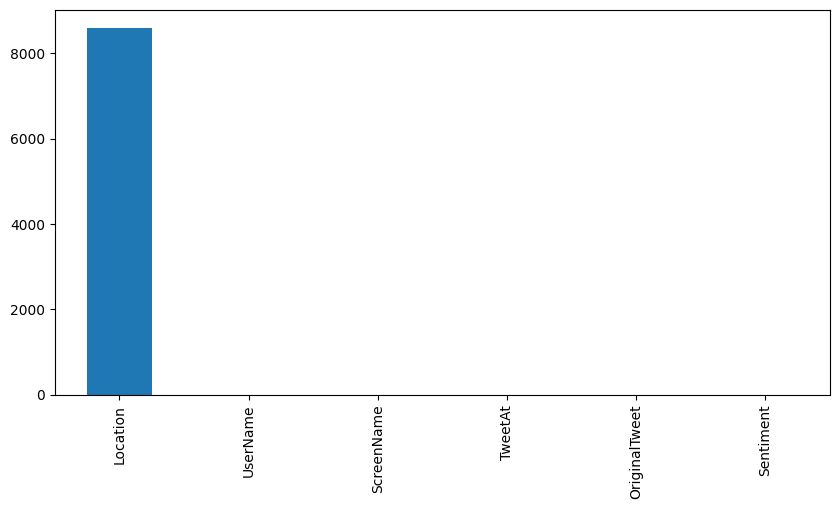

In [14]:
#plotting graph
plt.figure(figsize=(10,5))
corona_df.isnull().sum().sort_values(ascending=False).plot(kind="bar")

### Count of dupicate values

In [15]:
# count of duplicate rows
print(f' Number of duplicated observation present in the dataset:{corona_df.duplicated().sum()}')

 Number of duplicated observation present in the dataset:0


### **Details about the data**
we observed the dataset contains 6 features  

• Username : gives the name of the user (int64)

• Screenname: gives the screen name of the user (int64)

• Location: gives information regarding the location from which tweet is sent

• Tweet At: gives the date of the Tweet

• Original Tweet : Tweet Content

and sentiment as dependent feature

By detailed study we observed that the dataset the feature Location include missing values that is around 20% of total data.

In [16]:
#using describe function and including all numerical as well as categorical feature
corona_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


In [17]:
corona_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

### Visualization of the categorical feature


In [18]:
def visualize_feature(df,feature):

    '''function takes feature name as input and 
    prints the output of features value_count , visualize using pie plot and countplot'''
    print(f'value_count of {feature}')
    print(df[feature].value_counts())

    print("\n\n")
    
    # Visualize feature
    #visualization through pie plot
    df[feature].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

###**Target Variable**:

In [19]:
# To find the unique values in sentiment column
corona_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

value_count of Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64





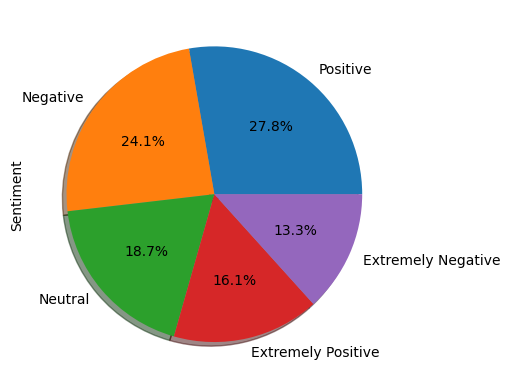

In [20]:
visualize_feature(corona_df,"Sentiment")

## Based on location

In [21]:
#Top 10 locations of tweet
location_based_top_tweetcount=corona_df['Location'].value_counts().head(10)
loc_df = pd.DataFrame(location_based_top_tweetcount)
loc_df.reset_index(inplace=True)
# rename the columns
loc_df = loc_df.rename(columns={'index':'Location', 'Location':'Tweet_count'})
loc_df

,Location,Tweet_count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


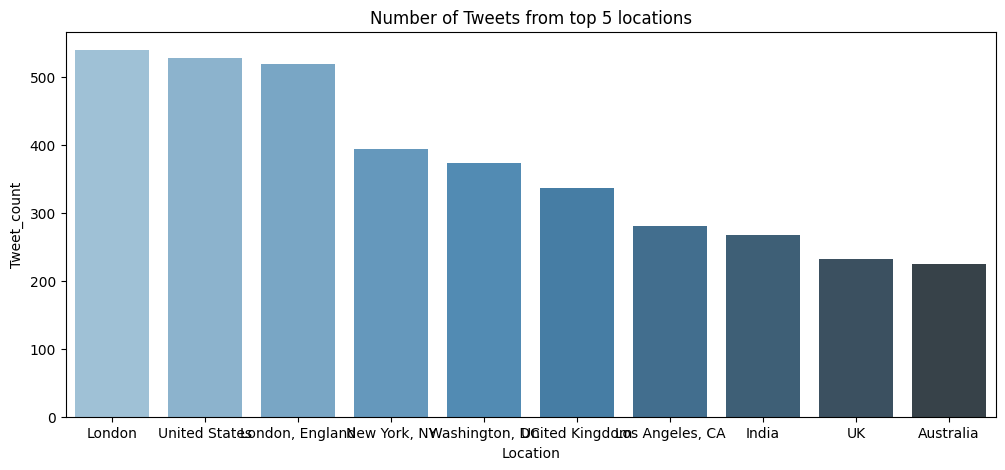

In [22]:
#visualisation of number of tweets from top 10 locations
plt.figure(figsize=[12,5])
sns.barplot(x=loc_df['Location'],y=loc_df['Tweet_count'],palette='Blues_d')
plt.title("Number of Tweets from top 5 locations")
plt.show()

from these we can observe that the top countries from where  the tweet is made is high in count is UK and US

In [23]:
#checking the dates of tweeting
corona_df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [24]:
print('value_count of "TweetAt"')
print(corona_df["TweetAt"].value_counts())


value_count of "TweetAt"
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64


In [25]:
#Top 5 locations of tweet
datebased_top_tweetcount=corona_df['TweetAt'].value_counts().head(12)
date_df = pd.DataFrame(datebased_top_tweetcount)
date_df.reset_index(inplace=True)
# rename the columns
date_df = date_df.rename(columns={'index':'date_TweetAt', 'TweetAt':'Tweet_count'})
date_df

,date_TweetAt,Tweet_count
0,20-03-2020,3448
1,19-03-2020,3215
2,25-03-2020,2979
3,18-03-2020,2742
4,21-03-2020,2653
5,22-03-2020,2114
6,23-03-2020,2062
7,17-03-2020,1977
8,08-04-2020,1881
9,07-04-2020,1843


Text(0.5, 1.0, 'Number of tweets with repect to date')

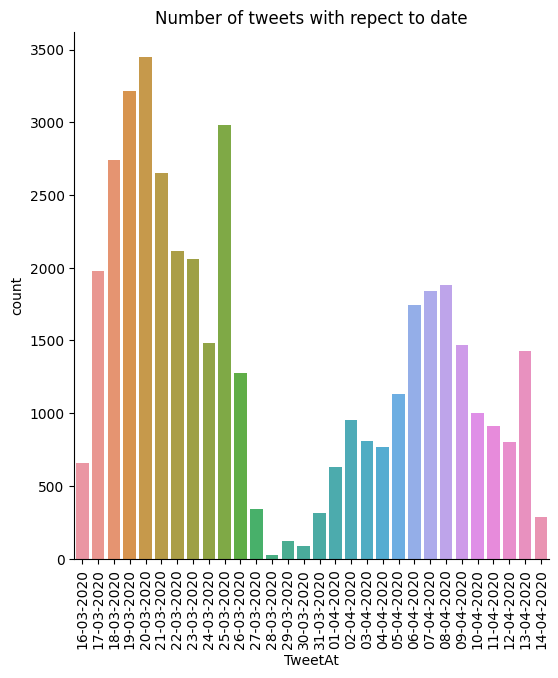

In [26]:
#visualisation of tweets with respect  to date
sns.catplot(x='TweetAt',height=6,kind='count',data=corona_df)
plt.xticks(rotation = 90)
plt.title("Number of tweets with repect to date")

As we observed 20-03-2020 and 19-03-2020 are the date on which heighest tweets are made


Here we can see the tweets which lies within first 20 rows based on diiferent sentiment like Positive,negative,Neutral,Extremely Negative,Extremely Positive.

In [27]:
#To view entire text
pd.set_option('display.max_colwidth', None)

In [28]:
corona_df[corona_df['Sentiment']=='Extremely Positive'].loc[:20,'OriginalTweet']

11                                                    Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.
12                  #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh
18    Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a statement. ÂToday this resulted in a systems impact affecting our ...\r\r\n https://t.co/TbzZ2MC3b3
Name: OriginalTweet, dtype: object

In [29]:
corona_df[corona_df['Sentiment']=='Positive'].loc[:20,'OriginalTweet']

1                                                                                         advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2                                                                                                                                                                                                   Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
3     My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
5               

In [30]:
corona_df[corona_df['Sentiment']=='Extremely Negative'].loc[:20,'OriginalTweet']

4     Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n
20                                                                           with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale
Name: OriginalTweet, dtype: object

In [31]:
corona_df[corona_df['Sentiment']=='Negative'].loc[:20,'OriginalTweet']

9    For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona
Name: OriginalTweet, dtype: object

In [32]:
corona_df[corona_df['Sentiment']=='Neutral'].loc[:20,'OriginalTweet']

0                                                                                                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
7                                                                                                                                                            Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ
10    All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9
16                                                                   ????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ?

From these tweet we observed that these tweet contains many punctuation marks,website link, numbers

**Remove the urls present in the dataset.**

In [33]:

#removing urls from dataset
corona_df['cleaned_tweet'] = corona_df['OriginalTweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')

In [34]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


**Remove the @ from tweet**

In [35]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [36]:
# create new column with removed @user
corona_df['cleaned_tweet'] = np.vectorize(remove_pattern)(corona_df['cleaned_tweet'], '@[\w]*')

In [37]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral"
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement"


**Removing Punctuations, Numbers, and Special Characters**

Removing punctuation and special characters is important in natural language processing (NLP) for several reasons:

1. Simplification: Punctuation and special characters do not usually add to the meaning of a sentence, but rather, they help to clarify the structure and tone of a sentence. Removing them simplifies the text and reduces noise in the data.

2. Consistency: Different writers use punctuation and special characters in different ways, which can lead to inconsistency in the data. Removing these characters ensures that the data is standardized and consistent.

3. Tokenization: In NLP, text is often tokenized, or split into individual words or phrases for analysis. Punctuation and special characters can interfere with this process, so removing them helps to ensure that the text is properly tokenized.

4. Efficiency: Removing punctuation and special characters can also make the text easier and faster to process, since the machine can focus on the most important information and ignore the noise.

Overall, removing punctuation and special characters is an important step in NLP preprocessing to ensure that the data is clean, consistent, and ready for analysis.



In [38]:
# remove special characters, numbers, punctuations
corona_df['cleaned_tweet'] = corona_df['cleaned_tweet'].str.replace('[^a-zA-Z#]+',' ')

In [39]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confinement #Confinementotal #ConfinementGeneral
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,Me ready to go at supermarket during the #COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The #coronavirus is a serious thing but please don t panic It causes shortage #CoronavirusFrance #restezchezvous #StayAtHome #confinement


**Removing words smaller than length 2**

In [40]:
# remove short words
corona_df['cleaned_tweet'] = corona_df['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [41]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID outbreak
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not the only one which empty PLEASE don panic THERE WILL ENOUGH FOOD FOR EVERYONE you not take more than you need Stay calm stay safe #COVID france #COVID #COVID #coronavirus #confinement #Confinementotal #ConfinementGeneral
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready supermarket during the #COVID outbreak Not because paranoid but because food stock litteraly empty The #coronavirus serious thing but please don panic causes shortage #CoronavirusFrance #restezchezvous #StayAtHome #confinement


**##Removing stopwords from cleaned Tweet using nltk.stopwords**

In [42]:
stopword_nltk = stopwords.words('english')
print(stopword_nltk)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
##Removing stopwords from cleaned Tweet using nltk.stopwords

sw_nltk = stopwords.words('english')
print(sw_nltk)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
#words which are important in sentiment analysis
imp_words=['not','no','nor','don',"don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",'isn', "isn't",'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't","won't", 'wouldn', "wouldn't"]

In [45]:
#Creating list of new stopwords excluding the words present in imp_words

#new stopword list
updated_stopwords=[x for x in sw_nltk if x not in imp_words]

In [46]:
#counting the no.of stopwords
len(updated_stopwords)

140

### Removing the stopwords

In Natural Language Processing (NLP), stopwords refer to common words that are frequently used in language, but do not carry significant meaning on their own. Examples of stopwords include "a", "an", "the", "and", "in", "on", "of", "to", "is", "are", etc.


Stopwords are often removed from text data during preprocessing in NLP because they can cause noise and interfere with analysis or modeling. By removing these words, the focus is shifted to the important words in the text, which can help improve the accuracy of NLP algorithms.


However, it is important to note that the choice of which words to consider as stopwords can vary depending on the specific application and context. For example, some stopwords may be important in certain types of text, such as domain-specific language or social media data. Therefore, it is important to carefully consider the context and purpose of the analysis when deciding which words to remove as stopwords.


In [47]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in updated_stopwords]
    # joining the list of words with space separator
    return " ".join(text)

In [48]:
#applying the stopwords functions on cleaned tweet 
corona_df['cleaned_tweet']=corona_df['cleaned_tweet'].apply(stopwords)


In [49]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds not order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid outbreak
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empty please don panic enough food everyone not take need stay calm stay safe #covid france #covid #covid #coronavirus #confinement #confinementotal #confinementgeneral
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready supermarket #covid outbreak not paranoid food stock litteraly empty #coronavirus serious thing please don panic causes shortage #coronavirusfrance #restezchezvous #stayathome #confinement


### Lemmatization
Lemmatization is a natural language processing (NLP) technique that involves reducing words to their base or dictionary form, called a lemma. The goal of lemmatization is to transform words into a canonical form that represents their meaning in the language.


For example, the lemma of the word "walking" would be "walk," and the lemma of the word "ate" would be "eat." This can be useful for tasks like text analysis, information retrieval, and machine learning.



In [50]:
#applying lemmatising function

wordnet_lemmatizer = WordNetLemmatizer()

def convert_base_word(text):
    lemmatized_text = []
    for i in text.split():
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))

    return ' '.join(lemmatized_text)

In [51]:
#applying functions of lemmatizing
corona_df['cleaned_tweet'] = corona_df['cleaned_tweet'].apply(lambda x: convert_base_word(x))

In [52]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shop account poss adequate supply regular meds not order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disable dedicate shop hours amid covid outbreak
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empty please don panic enough food everyone not take need stay calm stay safe #covid france #covid #covid #coronavirus #confinement #confinementotal #confinementgeneral
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready supermarket #covid outbreak not paranoid food stock litteraly empty #coronavirus serious thing please don panic cause shortage #coronavirusfrance #restezchezvous #stayathome #confinement


## Visualization Using Wordcloud
A word cloud is a visual representation of text data that displays the most frequently occurring words in a larger font size and the less frequent words in smaller font sizes. Word clouds are often used to quickly identify the main topics or themes in a large amount of text data, such as social media posts, customer reviews, or survey responses.

lets visualize the data to find the most commonly used words 

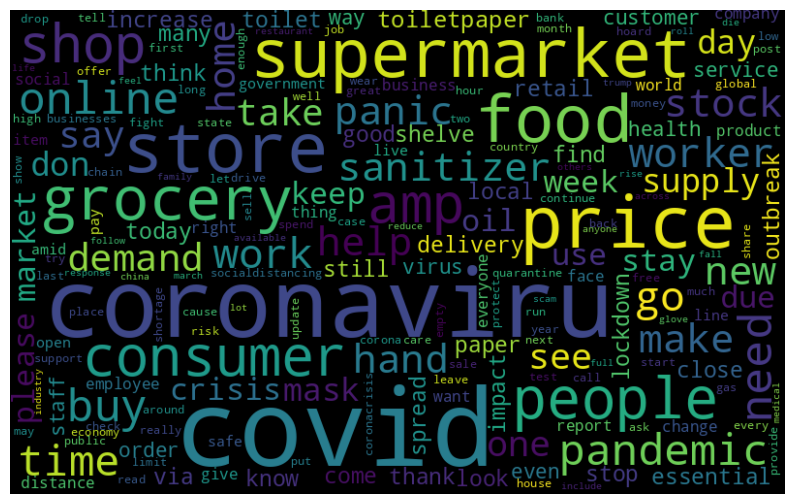

In [53]:
# create text of all_words that present in cleaned_tweet from all tweets
all_words = ' '.join([text for text in corona_df['cleaned_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="Bilinear")
plt.axis('off')
plt.show()

### commonly used words in neutral sentiment
Let's Visualize the words that are most commonly used in neutral sentiment

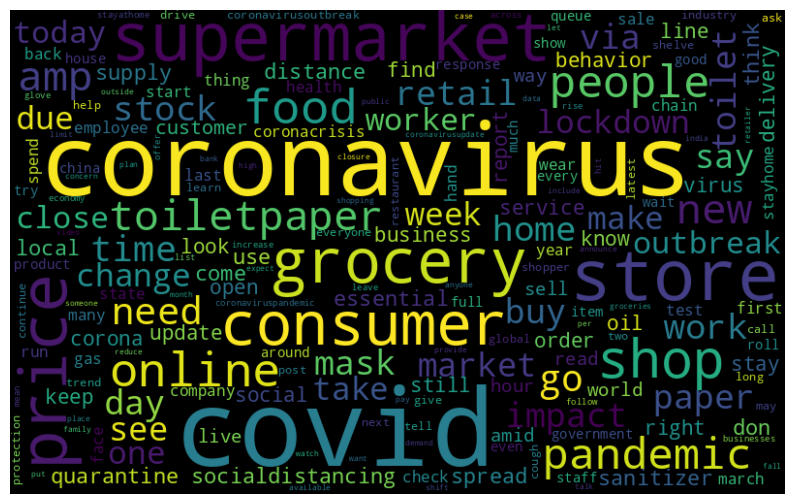

In [54]:
# create text from just neutral sentiment
neutral_words = ' '.join([text for text in corona_df['cleaned_tweet'][corona_df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### Commonly used words in Positive sentiment
Let's Visualize the words that are most commonly used in positive sentiment

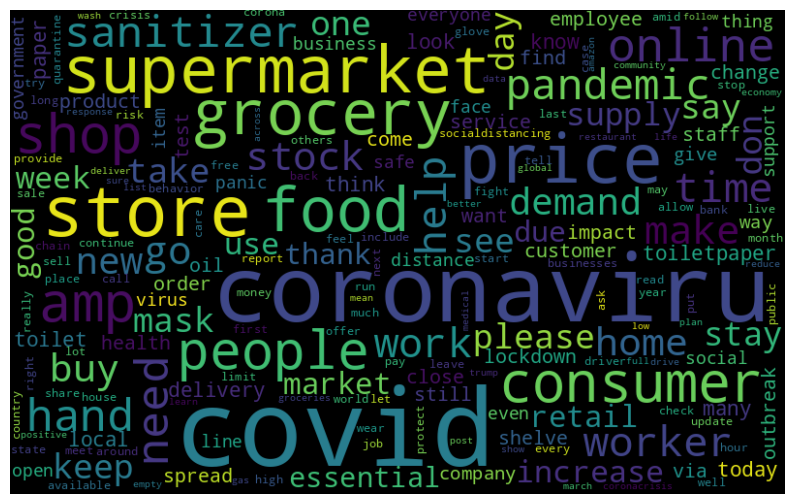

In [55]:
# create text from just Positive sentiment
positive_words = ' '.join([text for text in corona_df['cleaned_tweet'][corona_df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Commonly used words in Extremely Positive sentiment
Let's Visualize the words that are most commonly used in Extremely positive sentiment

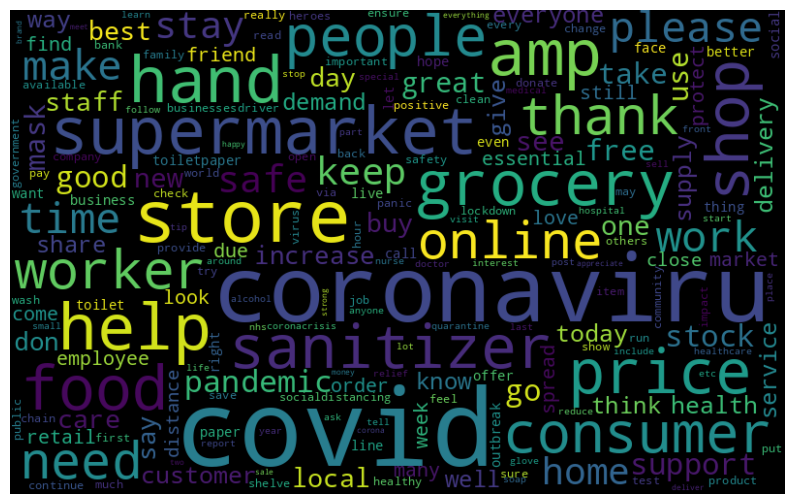

In [56]:
# create text from just Extremely Negative sentiment
Extremely_Positive = ' '.join([text for text in corona_df['cleaned_tweet'][corona_df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(Extremely_Positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Commonly used words in Extremely negative sentiment
Let's Visualize the words that are most commonly used in Extremely negative sentiment

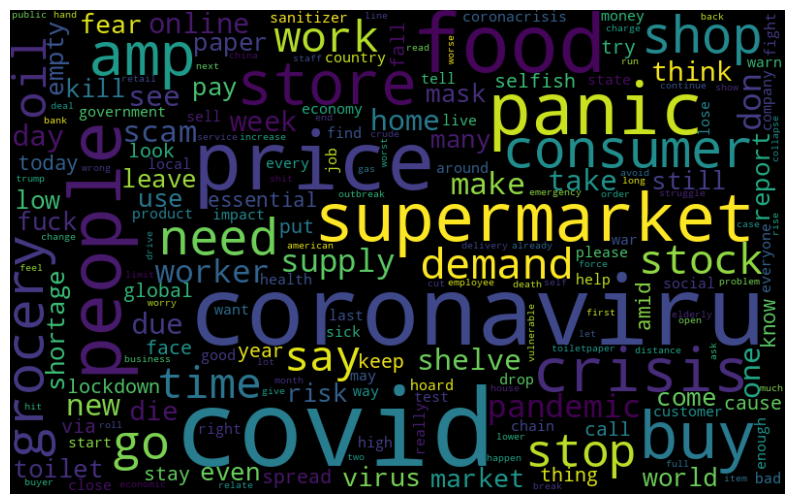

In [57]:
# create text from just Extremely Negative sentiment
Extremely_Negative = ' '.join([text for text in corona_df['cleaned_tweet'][corona_df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations=False).generate(Extremely_Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### From above analysis we can remove some words like 'covid','supermarket','price','grocery','coronavirus','consumer','coronaviru','market'

In [58]:
#removable words
removable_words=['covid','supermarket','price','grocery','coronavirus','consumer','coronaviru','market']

In [59]:
def remove_words(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in removable_words]
    # joining the list of words with space separator
    return " ".join(text)

In [60]:
#applying remove words function to corona_df
corona_df['cleaned_tweet']=corona_df['cleaned_tweet'].apply(remove_words)

In [61]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shop account poss adequate supply regular meds not order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,australia woolworths give elderly disable dedicate shop hours amid outbreak
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empty please don panic enough food everyone not take need stay calm stay safe #covid france #covid #covid #coronavirus #confinement #confinementotal #confinementgeneral
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,ready #covid outbreak not paranoid food stock litteraly empty #coronavirus serious thing please don panic cause shortage #coronavirusfrance #restezchezvous #stayathome #confinement


### Feature selection
Feature selection refers to the process of selecting a subset of relevant features or variables from a larger set of features that are available in a dataset. The goal of feature selection is to improve the performance of a machine learning model by reducing the number of irrelevant or redundant features, while still preserving the most important ones.


By selecting only the most relevant features, we can simplify the model and reduce the risk of overfitting. Feature selection can also reduce the computational complexity of the model and improve its interpretability, since it focuses on the most important factors that are driving the prediction.



In [62]:
#creating new dataframe with required features
new_df=corona_df[['cleaned_tweet','Sentiment']]

In [63]:
new_df.head()

,cleaned_tweet,Sentiment
0,,Neutral
1,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shop account poss adequate supply regular meds not order,Positive
2,australia woolworths give elderly disable dedicate shop hours amid outbreak,Positive
3,food stock not one empty please don panic enough food everyone not take need stay calm stay safe #covid france #covid #covid #coronavirus #confinement #confinementotal #confinementgeneral,Positive
4,ready #covid outbreak not paranoid food stock litteraly empty #coronavirus serious thing please don panic cause shortage #coronavirusfrance #restezchezvous #stayathome #confinement,Extremely Negative


In [64]:
#find shape
new_df.shape

(41157, 2)

**Here we will focuse on data inorder to remove rows of the DataFrame rows with empty values in the 'cleaned_tweet' column.**

In [65]:
#Clean the tweets
new_df=new_df[new_df['cleaned_tweet']!='']

In [66]:
#find shape
new_df.shape

(41117, 2)

In [67]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE"]
metrics_df = pd.DataFrame(columns = column_names)

In [68]:
#Function to add metrics each time any model is evaluated
def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(y_test, y_pred), 
                  'RECALL': recall_score(y_test, y_pred,average='weighted'),
                  'PRECISION':precision_score(y_test, y_pred,average='weighted'),
                  'F1-SCORE':f1_score(y_test, y_pred,average='weighted')}
                  ,ignore_index=True)
  return df

## **Train-Test Split**


The train-test split is the process of dividing the original dataset into two sets: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate its performance. By evaluating the model on the test set, we can get an estimate of how well the model will perform on new, unseen data.

In [69]:
#assign X as a independent variable and y as a dependent variable
X = new_df['cleaned_tweet']
y = new_df['Sentiment']
#spliting dataset into training and testing 

In [70]:
#importing required libriaries
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [71]:
x_train.head()

22457    respect sir traders get chance exploit commodities amp common ppl force buy lockdown kindly issue directions precautionary measure #lockdown
22290                surge online commerce trigger outbreak shift shop sentiment transactions physical store digital retail platforms hong kong learn
20475             know something good know something properly better simple step properly use hand sanitizer order prevent spread stay clean everyone
27661                                                                                                           wear balaclava store #covid #staysafe
14347                beloved cashier store near duke university cust know know seniors hard time get around take time urge store type program seniors
Name: cleaned_tweet, dtype: object

In [72]:
x_test.head()

14770                                      say work little store fresh fruit veg bread milk products daily small instore bakery stock every morning much please don come shop get angry staff best #covid #coronavirus
30768                          work basis alcohol sanitizer require kill #coronavirus self prescribe gin amp tonic every hours kill #corona throat display symptoms shall move bond dry martini casino royale gin vodk
17702                                               #covid fmcg cos battle ready logistics concern vivek gambhir amp ceo godrej products say despite short term spike demand sector isn immune broader slowdown report
23457    time crisis like pandemic people hoard essential commodities hike unimaid produce hand sanitizer accord specifications guidelines recommendations distribute free university community staff essential duties
20293                                                                                                                                       

## **TF-IDF**
TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is a popular feature extraction technique used in natural language processing (NLP) to convert a collection of text documents into numerical feature vectors. It works by representing each document as a vector in a high-dimensional space, where each dimension corresponds to a unique term in the corpus.


TF-IDF is calculated by multiplying two components:



1. Term Frequency (TF): It measures the frequency of a term in a document. It is calculated by counting the number of occurrences of a term in a document and then normalizing it by the total number of terms in the document.
2. Inverse Document Frequency (IDF): It measures the importance of a term in the corpus. It is calculated as the logarithm of the total number of documents in the corpus divided by the number of documents containing the term.

    The TF-IDF score is obtained by multiplying the TF and IDF values for each term in a document. The resulting vector represents the document in the high-dimensional space.


The TF-IDF Vectorizer is an implementation of the TF-IDF technique in Python's scikit-learn library. It provides a convenient way to preprocess text data and convert it into numerical fe

In [73]:
#Apply TFID Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True,max_df = 0.95,min_df = 1)

In [74]:
#appling on train and test set
train_vectorized = vectorizer.fit_transform(x_train.values)
test_vectorized = vectorizer.transform(x_test.values)
y_test=y_test.values
y_train=y_train.values     

## **Model Building**

1. **Naive Bayes**

Naive Bayes is a probabilistic machine learning algorithm that is commonly used for classification tasks. It is based on Bayes' theorem, which is a mathematical formula for calculating the probability of an event based on prior knowledge of related events. Naive Bayes is called "naive" because it makes the assumption that all the features in the dataset are independent of each other, which is often not true in practice.
Types of Naive Bayes


i. **Multinomial Naive Bayes**: This model is used when the features are discrete and represent counts or frequencies, such as the frequency of words in a document. It assumes that the likelihood of each feature follows a multinomial distribution, and it calculates the probabilities using the frequency of each feature.


The best parameter is {'alpha': 0.1}
Training accuracy Score    : 0.7857294865168881
Testing accuracy Score : 0.4400535019455253
                    precision    recall  f1-score   support

Extremely Negative       0.28      0.60      0.38       508
Extremely Positive       0.26      0.55      0.36       627
          Negative       0.51      0.40      0.45      2501
           Neutral       0.33      0.60      0.43       848
          Positive       0.64      0.39      0.48      3740

          accuracy                           0.44      8224
         macro avg       0.40      0.51      0.42      8224
      weighted avg       0.51      0.44      0.45      8224



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

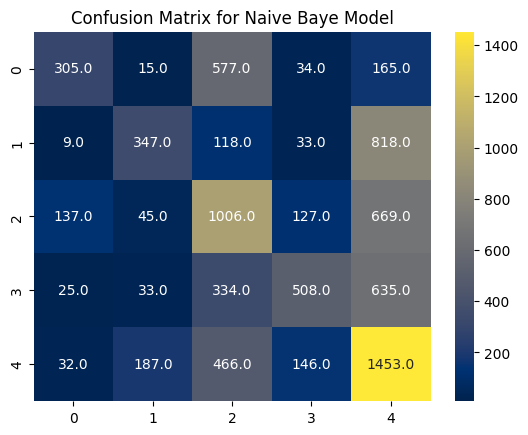

In [75]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [76]:
metrics_df = add_metrics_details("Naive_Baye(Multinomial)-Tfid",y_test,NB_prediction,metrics_df)

ii. **Bernoulli Naive Bayes**: This model is similar to Multinomial Naive Bayes, but it is used when the features are binary (i.e., they take on only two values). It assumes that the likelihood of each feature follows a Bernoulli distribution, and it calculates the probabilities using the presence or absence of each feature.

The best parameter is {'alpha': 0.1}
Training accuracy Score    : 0.8060681603988691
Testing accuracy Score : 0.48553015564202334
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.52      0.51      1050
Extremely Positive       0.47      0.54      0.50      1151
          Negative       0.41      0.42      0.41      1910
           Neutral       0.63      0.56      0.59      1727
          Positive       0.46      0.44      0.45      2386

          accuracy                           0.49      8224
         macro avg       0.49      0.50      0.49      8224
      weighted avg       0.49      0.49      0.49      8224



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

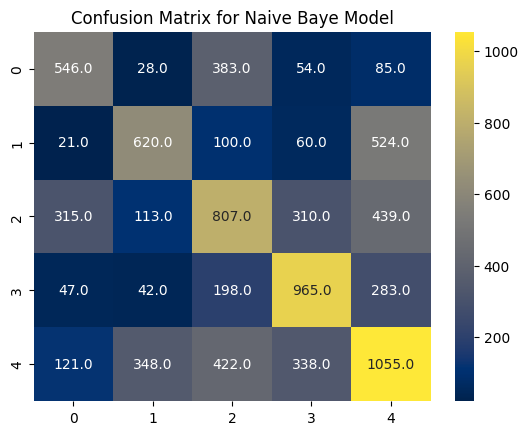

In [77]:
#Naive Bayes Classifier model with Hyperparameter tuning
from sklearn.naive_bayes import BernoulliNB 

naiveByes_clf = BernoulliNB ()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [78]:
metrics_df = add_metrics_details("Naive_Baye(Bernoulli's)-Tfid",y_test,NB_prediction,metrics_df)

### 2. Logistic regression

Logistic regression is a popular statistical method used in machine learning for binary classification problems. The goal of binary classification is to predict a binary outcome, such as whether a customer will buy a product or not, based on a set of input variables.

In [79]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])
#fitting data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(train_vectorized,y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [80]:
#prediction

y_pred = logreg.predict(test_vectorized)

Training accuracy Score    : 0.8813729364910468
Testing accuracy Score : 0.5922908560311284
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.60      0.62      1096
Extremely Positive       0.65      0.59      0.62      1325
          Negative       0.53      0.54      0.54      1984
           Neutral       0.65      0.68      0.66      1535
          Positive       0.55      0.58      0.56      2284

          accuracy                           0.59      8224
         macro avg       0.61      0.60      0.60      8224
      weighted avg       0.59      0.59      0.59      8224



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression(Tfid)')

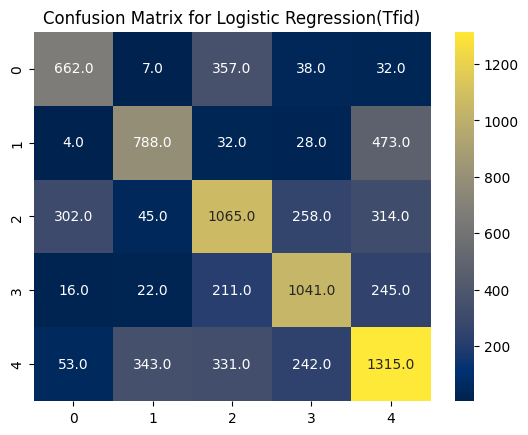

In [81]:
acc = accuracy_score(y_test,y_pred)
train_acc=logreg.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression(Tfid)")

In [82]:
metrics_df = add_metrics_details("Logistic_Regression-Tfid",y_test,y_pred,metrics_df)

## 4. Support Vector Machine
SVM stands for Support Vector Machines. It is a supervised machine learning algorithm that can be used for classification, regression, and outlier detection.


The main idea behind SVM is to find the best hyperplane that separates different classes of data points. The hyperplane is selected in such a way that it maximizes the margin between the classes, i.e., the distance between the closest data points from each class.

In [83]:
from sklearn.svm import SVC
#fitting data
svm = SVC(kernel='rbf')
#train
svm.fit(train_vectorized,y_train)

SVC()

In [84]:
#predict
y_pred = svm.predict(test_vectorized)

Training accuracy Score    : 0.9603563068129998
Testing accuracy Score : 0.5995865758754864
                    precision    recall  f1-score   support

Extremely Negative       0.73      0.48      0.58      1096
Extremely Positive       0.77      0.49      0.60      1325
          Negative       0.53      0.58      0.56      1984
           Neutral       0.66      0.67      0.67      1535
          Positive       0.54      0.69      0.60      2284

          accuracy                           0.60      8224
         macro avg       0.65      0.58      0.60      8224
      weighted avg       0.62      0.60      0.60      8224



Text(0.5, 1.0, 'Confusion Matrix for SVM(TF-IDF)')

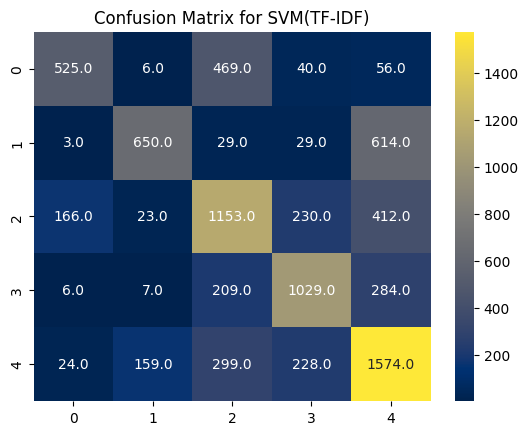

In [85]:
acc = accuracy_score(y_test,y_pred)
train_acc=svm.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for SVM(TF-IDF)")

In [86]:
metrics_df = add_metrics_details("SVM-TF-IDF",y_test,y_pred,metrics_df)

In [87]:
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE
0,Naive_Baye(Multinomial)-Tfid,0.440054,0.440054,0.485926,0.429741
1,Naive_Baye(Bernoulli's)-Tfid,0.485530,0.485530,0.485108,0.484408
2,Logistic_Regression-Tfid,0.592291,0.592291,0.593578,0.592513
3,SVM-TF-IDF,0.599587,0.599587,0.621526,0.599312


## **Count Vectorizer**
let's try using count vectorizer

CountVectorizer is a text preprocessing tool in Natural Language Processing (NLP) that converts a collection of text documents to a matrix of token counts. It is a simple and efficient method to extract features from text data. The matrix produced by CountVectorizer represents the frequency of occurrence of each word in each document.

In [88]:
#Applying CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [89]:
train_vectorized=vectorizer.fit_transform(x_train)
test_vectorized=vectorizer.transform(x_test)

In [90]:
train_vectorized.shape


(32893, 33338)

### Naive Bayes- Multinomial Naive bayese

The best parameter is {'alpha': 1}
Training accuracy Score    : 0.7164138266500472
Testing accuracy Score : 0.47568093385214005
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.62      0.46       651
Extremely Positive       0.40      0.59      0.47       894
          Negative       0.51      0.43      0.47      2394
           Neutral       0.34      0.67      0.45       782
          Positive       0.63      0.41      0.50      3503

          accuracy                           0.48      8224
         macro avg       0.45      0.54      0.47      8224
      weighted avg       0.52      0.48      0.48      8224



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

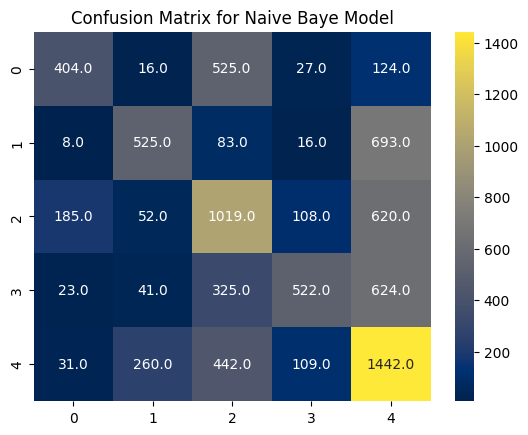

In [91]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [92]:
metrics_df = add_metrics_details("Naive_Baye(Multinomial)-CountVectorizer",y_test,NB_prediction,metrics_df)

## Naive Bayes- Bernouli Naive Bayes


The best parameter is {'alpha': 0.1}
Training accuracy Score    : 0.8060681603988691
Testing accuracy Score : 0.48553015564202334
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.52      0.51      1050
Extremely Positive       0.47      0.54      0.50      1151
          Negative       0.41      0.42      0.41      1910
           Neutral       0.63      0.56      0.59      1727
          Positive       0.46      0.44      0.45      2386

          accuracy                           0.49      8224
         macro avg       0.49      0.50      0.49      8224
      weighted avg       0.49      0.49      0.49      8224



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

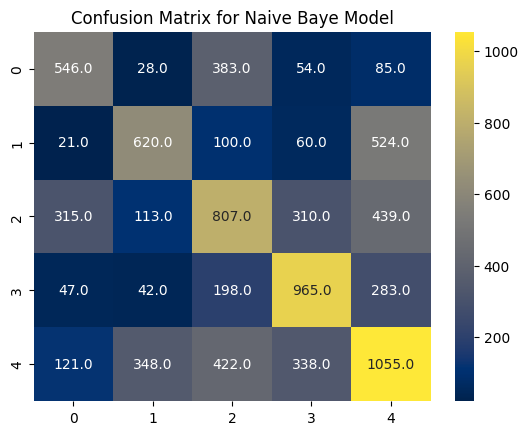

In [93]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import BernoulliNB 

naiveByes_clf = BernoulliNB ()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [94]:
metrics_df = add_metrics_details("Naive_Baye(Bernoulli's)-CountVectorizer",y_test,NB_prediction,metrics_df)

## Logistic Regression


In [95]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])
#training data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(train_vectorized,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [96]:
#prediction

y_pred = logreg.predict(test_vectorized)

Training accuracy Score    : 0.9216246617821421
Testing accuracy Score : 0.6173394941634242
                    precision    recall  f1-score   support

Extremely Negative       0.68      0.62      0.65      1096
Extremely Positive       0.70      0.62      0.66      1325
          Negative       0.56      0.55      0.56      1984
           Neutral       0.64      0.73      0.68      1535
          Positive       0.58      0.60      0.59      2284

          accuracy                           0.62      8224
         macro avg       0.63      0.62      0.63      8224
      weighted avg       0.62      0.62      0.62      8224



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression(CountVectorizer)')

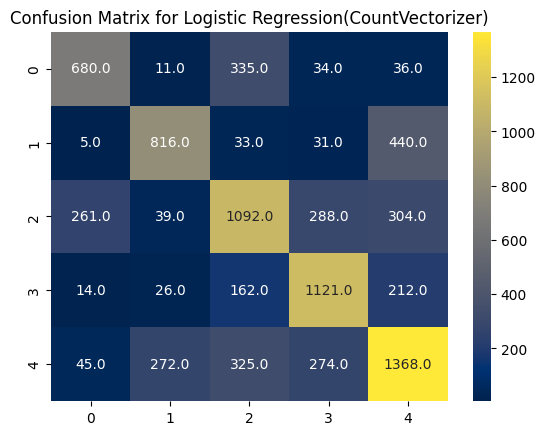

In [97]:
acc = accuracy_score(y_test,y_pred)
train_acc=logreg.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression(CountVectorizer)")

In [98]:
metrics_df = add_metrics_details("Logistic_Regression-CounntVectorizer",y_test,y_pred,metrics_df)

## Support Vector Machine

In [100]:
from sklearn.svm import SVC
#fitting data
svm = SVC(kernel='rbf')
svm.fit(train_vectorized,y_train)

SVC()

In [101]:
y_pred = svm.predict(test_vectorized)

Training accuracy Score    : 0.9124129754051014
Testing accuracy Score : 0.605544747081712
                    precision    recall  f1-score   support

Extremely Negative       0.72      0.49      0.58      1096
Extremely Positive       0.78      0.53      0.63      1325
          Negative       0.54      0.55      0.55      1984
           Neutral       0.63      0.72      0.67      1535
          Positive       0.54      0.68      0.60      2284

          accuracy                           0.61      8224
         macro avg       0.65      0.59      0.61      8224
      weighted avg       0.62      0.61      0.60      8224



Text(0.5, 1.0, 'Confusion Matrix for SVM(Count_Vectorizer)')

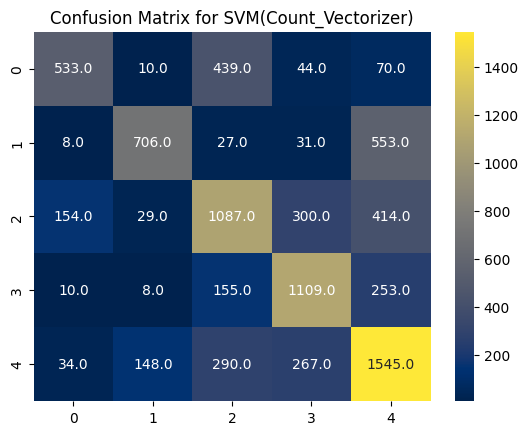

In [102]:
acc = accuracy_score(y_test,y_pred)
train_acc=svm.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for SVM(Count_Vectorizer)")

In [103]:
metrics_df = add_metrics_details("SVM-(Count_Vectorizer)",y_test,y_pred,metrics_df)

In [104]:
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE
0,Naive_Baye(Multinomial)-Tfid,0.440054,0.440054,0.485926,0.429741
1,Naive_Baye(Bernoulli's)-Tfid,0.485530,0.485530,0.485108,0.484408
2,Logistic_Regression-Tfid,0.592291,0.592291,0.593578,0.592513
3,SVM-TF-IDF,0.599587,0.599587,0.621526,0.599312
4,Naive_Baye(Multinomial)-CountVectorizer,0.475681,0.475681,0.518919,0.472683
5,Naive_Baye(Bernoulli's)-CountVectorizer,0.485530,0.485530,0.485108,0.484408
6,Logistic_Regression-CounntVectorizer,0.617339,0.617339,0.619107,0.617023
7,SVM-(Count_Vectorizer),0.605545,0.605545,0.623178,0.604955


### Lets reduce the no.of class of sentiment to 3 from 5 classes
1. negative- by combining negative and extremely negative classes
2. neutral - neutral
3. positive- by combining positive and extremely positive classes

In [105]:
#function to encode 

def encode_class(sentiment):
    # Changing neutral labels as Neutral
    if sentiment=='Neutral':  
        return 'Neutral'     

    # Combining Positive and extremely positive labels as Positive                                                        
    elif (sentiment=='Positive') or  (sentiment=='Extremely Positive'):  
        return 'Positive'     

    #Changing negative and extremely Negative as  Negative                                                      
    else:
        return 'Negative'       
new_df['Sentiment'] = new_df['Sentiment'].apply(encode_class)

In [106]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE"]
new_metrics_df = pd.DataFrame(columns = column_names)

def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(y_test, y_pred), 
                  'RECALL': recall_score(y_test, y_pred,average='weighted'),
                  'PRECISION':precision_score(y_test, y_pred,average='weighted'),
                  'F1-SCORE':f1_score(y_test, y_pred,average='weighted')}
                  ,ignore_index=True)
  return df

In [107]:
#assign X as a independent variable and y as a dependent variable
X = new_df['cleaned_tweet']
y = new_df['Sentiment']
#spliting dataset into training and testing 

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [109]:
#countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_vectorized=vectorizer.fit_transform(x_train)
test_vectorized=vectorizer.transform(x_test)
#shape after applying the countvectorizer
train_vectorized.shape

(32893, 33310)

## Naive Bayes- Multinomial Naive Bayes

The best parameter is {'alpha': 1}
Training accuracy Score    : 0.7963092451281427
Testing accuracy Score : 0.6915126459143969
              precision    recall  f1-score   support

    Negative       0.76      0.69      0.73      3386
     Neutral       0.29      0.70      0.41       629
    Positive       0.80      0.69      0.74      4209

    accuracy                           0.69      8224
   macro avg       0.62      0.69      0.63      8224
weighted avg       0.75      0.69      0.71      8224



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

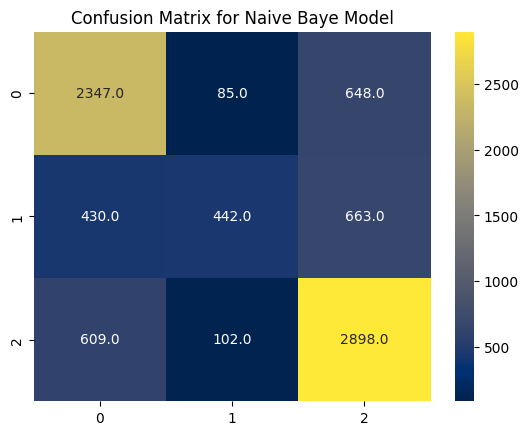

In [110]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [111]:
new_metrics_df = add_metrics_details("Naive_Baye(Multinomial)-CountVectorizer",y_test,NB_prediction,new_metrics_df)

## Naive Bayes -Bournouli Naive Bayes


The best parameter is {'alpha': 1}
Training accuracy Score    : 0.8142765938041528
Testing accuracy Score : 0.7082928015564203
              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73      3220
     Neutral       0.41      0.72      0.52       878
    Positive       0.80      0.70      0.75      4126

    accuracy                           0.71      8224
   macro avg       0.65      0.71      0.67      8224
weighted avg       0.74      0.71      0.72      8224



Text(0.5, 1.0, 'Confusion Matrix for Naive Baye Model')

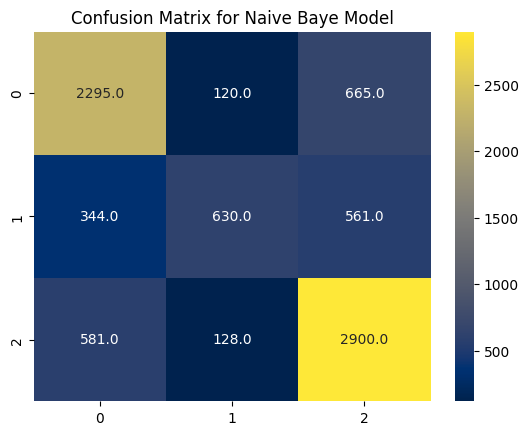

In [112]:
#Naive Bayes Classifier model
from sklearn.naive_bayes import BernoulliNB 

naiveByes_clf = BernoulliNB ()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

clf=GridSearchCV(naiveByes_clf,param,cv=10) 
clf.fit(train_vectorized,y_train)
print("The best parameter is",clf.best_params_)
NB_prediction =clf.predict(test_vectorized)
NB_train_accuracy = clf.score(train_vectorized,y_train)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print(f'Training accuracy Score    : {NB_train_accuracy}')
print(f'Testing accuracy Score : {NB_accuracy}' )
print(classification_report(NB_prediction,y_test))
cm = confusion_matrix( y_test,NB_prediction)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Naive Baye Model")

In [113]:
new_metrics_df = add_metrics_details("Naive_Baye(Bernoulli's)-CountVectorizer",y_test,NB_prediction,new_metrics_df)

## Logistic Regression

In [114]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])
#training data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(train_vectorized,y_train)
#prediction
y_pred = logreg.predict(test_vectorized)

Training accuracy Score    : 0.9548840178761439
Testing accuracy Score : 0.8151750972762646
              precision    recall  f1-score   support

    Negative       0.83      0.82      0.82      3080
     Neutral       0.71      0.75      0.73      1535
    Positive       0.85      0.84      0.85      3609

    accuracy                           0.82      8224
   macro avg       0.80      0.80      0.80      8224
weighted avg       0.82      0.82      0.82      8224



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression(CountVectorizer)')

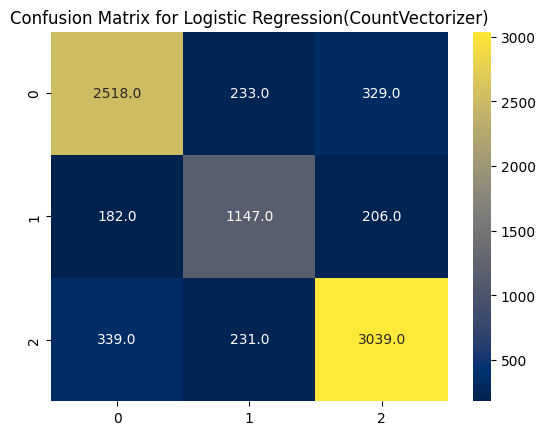

In [115]:
acc = accuracy_score(y_test,y_pred)
train_acc=logreg.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression(CountVectorizer)")

In [116]:
new_metrics_df = add_metrics_details("Logistic_Regression-CounntVectorizer",y_test,y_pred,new_metrics_df)

## SVM

In [117]:
from sklearn.svm import SVC
#fitting data
svm = SVC(kernel='rbf')
svm.fit(train_vectorized,y_train)

SVC()

In [118]:
y_pred = svm.predict(test_vectorized)

Training accuracy Score    : 0.9433922111087465
Testing accuracy Score : 0.7867217898832685
              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79      3080
     Neutral       0.70      0.70      0.70      1535
    Positive       0.81      0.83      0.82      3609

    accuracy                           0.79      8224
   macro avg       0.77      0.77      0.77      8224
weighted avg       0.79      0.79      0.79      8224



Text(0.5, 1.0, 'Confusion Matrix for SVM(Count_Vectorizer)')

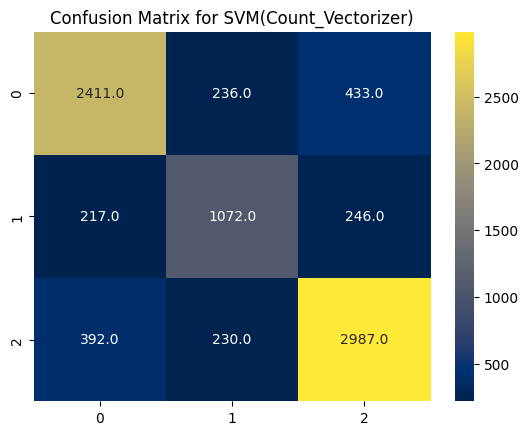

In [119]:
acc = accuracy_score(y_test,y_pred)
train_acc=svm.score(train_vectorized,y_train)
print(f'Training accuracy Score    : {train_acc}')
print(f'Testing accuracy Score : {acc}' )
print(classification_report(y_test,y_pred))
cm = confusion_matrix( y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for SVM(Count_Vectorizer)")

In [120]:
new_metrics_df = add_metrics_details("SVM-(Count_Vectorizer)",y_test,y_pred,new_metrics_df)


In [121]:
#Display the evaluation metrics of each of the experimented model
new_metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE
0,Naive_Baye(Multinomial)-CountVectorizer,0.691513,0.691513,0.692903,0.673464
1,Naive_Baye(Bernoulli's)-CountVectorizer,0.708293,0.708293,0.709297,0.699380
2,Logistic_Regression-CounntVectorizer,0.815175,0.815175,0.816345,0.815658
3,SVM-(Count_Vectorizer),0.786722,0.786722,0.786645,0.786632
